In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.groupby('target').size())

target
0    138
1    165
dtype: int64


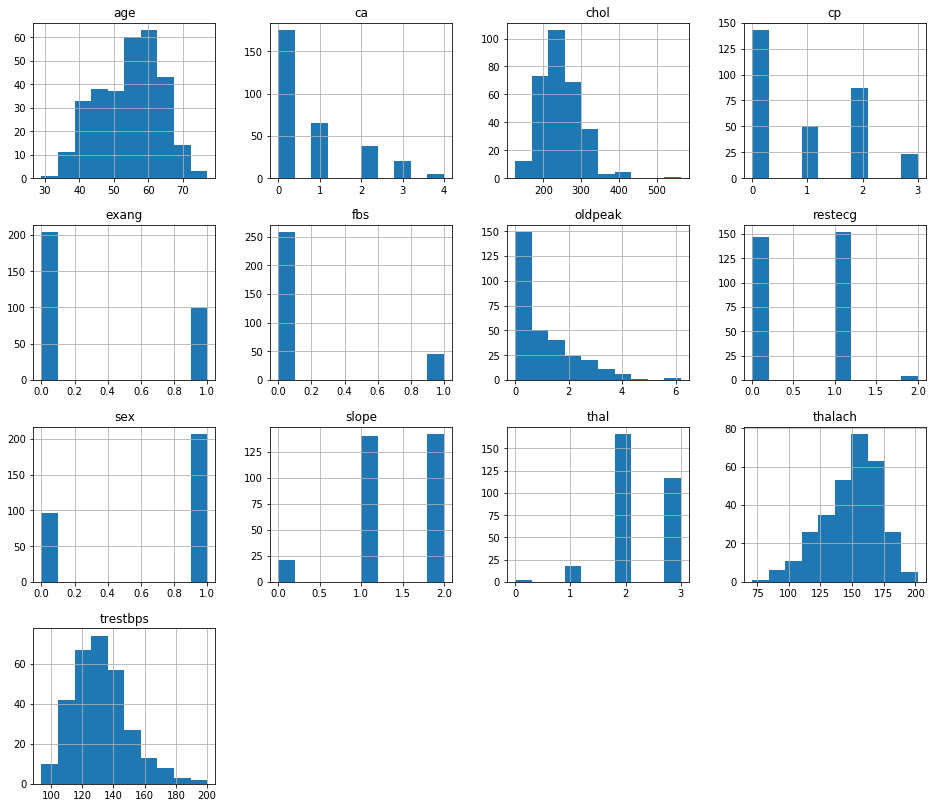

In [5]:
df.drop(['target'],1).hist(figsize=(16,14))
plt.show()

In [6]:
x = np.array(df[["age","sex"]])
y = np.array(df['target'])
X = np.array(list(zip(x,y)))

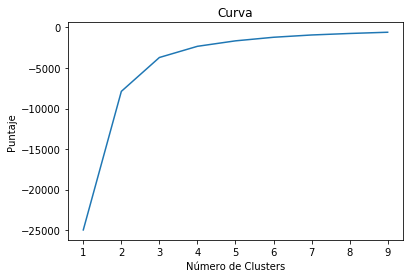

In [7]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=4).fit(x)
labels = kmeans.predict(x)
# los centroides son el 'centro' de cada cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[58.41414141  0.68686869]
 [41.64788732  0.70422535]
 [66.51666667  0.58333333]
 [51.26027397  0.73972603]]


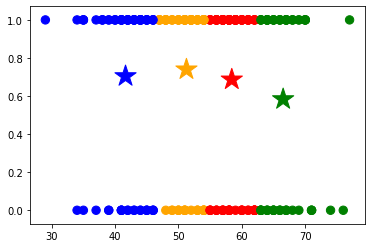

In [10]:
colores=['red','blue','green','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])

f1 = df['age'].values
f2 = df['sex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=500)
plt.show()